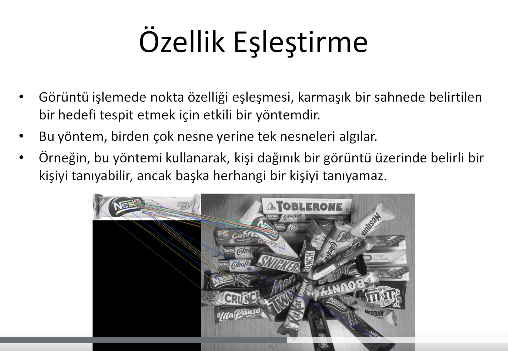

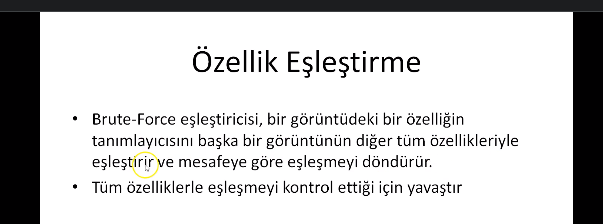

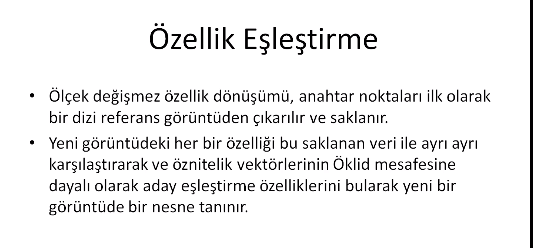

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# ana görüntüyü içe aktar

chos = cv2.imread("chocalates.jpg",0) 

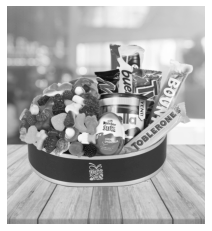

In [13]:
plt.figure()
plt.imshow(chos,cmap = "gray")
plt.axis("off")
plt.show();


In [14]:
cho = cv2.imread("toblerone.jpg")

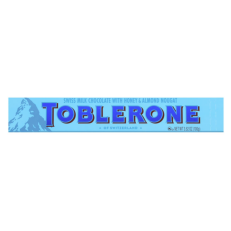

In [15]:
plt.figure()
plt.imshow(cho,cmap = "gray")
plt.axis("off")
plt.show();

In [16]:
# orb tanımlayıcısı  : ana görüntü ile aradığımız görüntü arasındaki noktaları tespit edecek
# köşe , kenar vs gibi nesneye ait özellikler

In [17]:
orb = cv2.ORB_create()

In [18]:
# find the keypoints and descriptors with SIFT
# anahtar nokta tespiti  

kp1, des1 = orb.detectAndCompute(cho,None)
kp2, des2 = orb.detectAndCompute(chos,None)

(-0.5, 2799.5, 1499.5, -0.5)

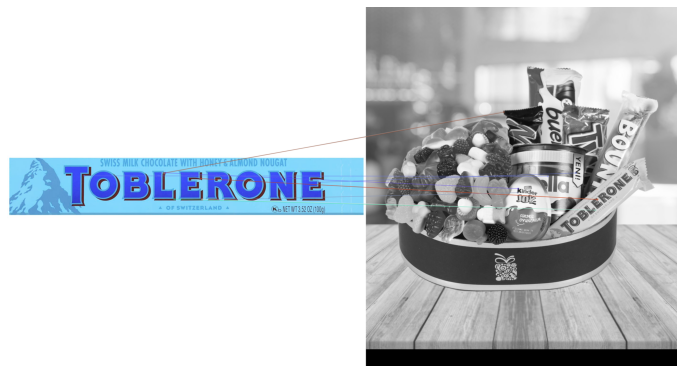

In [30]:
# eşleme : BFmatcher ile 
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # yöntem norm hamming
 
# noktaları eşleştir
matches = bf.match(des1,des2)

# mesafeye göre sırala
matches = sorted(matches, key = lambda x:x.distance)



# ilk 20 eşleşen resmi görüntüle
img_matches= cv2.drawMatches(cho,kp1,chos,kp2,matches[:10], None,flags=2) 
# fotograf pikselleri büyüdüğünde beklenılen sonucu vermeyebilir opencv ve 
#  TypeError: Required argument 'outImg' (pos 6) not found hatası verebilr
# bu durumda  None parametresi ile çıktıyı görmezden gelinebilir

plt.figure(figsize=(12,8))
plt.imshow(img_matches)
plt.axis("off")

yazılardaki köşeler ile doğru eşleşmeyi neredeyse yapmış diyebiliriz

In [ ]:
# aslında burada yaptıgımız şey train(sepet) ve target (toblerone) olarak düşünebiliriz 

# SIFT tanımlayıcısı 

### size farklı olsa bile daha iyi çalışır 

In [32]:
!pip install opencv-contrib-python --user


In [ ]:
sift = cv2.xfeatures2d.SIFT_create() 
# 

In [33]:
# BF : eşleşme işlemini yapar

bf2 = cv2.BFMatcher()


In [35]:
# anahtar nokta tespiti, sift ile

kp1, des1 = orb.detectAndCompute(cho,None)
kp2, des2 = orb.detectAndCompute(chos,None)

In [37]:
# des1 ve des2 arasındaki en iyi k eşleşmesini bulacağım (KNN)
matches = bf2.knnMatch(des1 , des2, k = 2 ) # en yakın 2 li eşleşmelere bakalım 


In [38]:
iyi_eşleşme = []

for match1 , match2  in  matches :  # match 1 ve 2 yukarıda belirtmiştiim k'dan geliyor
    
    if match1.distance < 0.75*match2.distance : #  tersi kötü eşleşmedir zaten onu almama gerek yok
        iyi_eşleşme.append([match1])
       

(-0.5, 2799.5, 1499.5, -0.5)

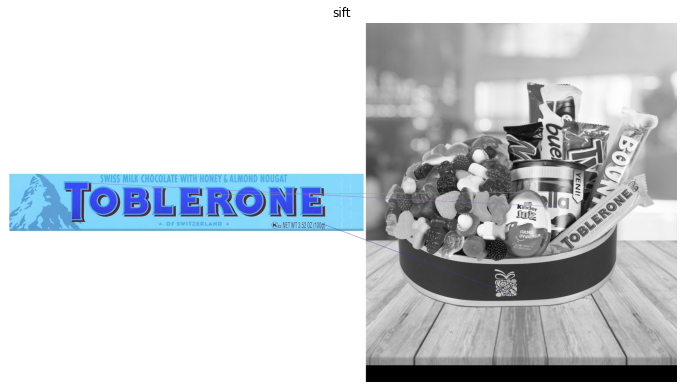

In [41]:
# görselleştirme 

plt.figure(figsize=(12,8))
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,iyi_eşleşme[:20], None,flags=2)
plt.imshow(sift_matches)
plt.title("sift")
plt.axis("off")